In [1]:
import pandas as pd

aasu_spatial = pd.read_csv('Aasu_ALL_15min_data_spatial_variables.csv')
poloa_spatial = pd.read_csv('Poloa_ALL_15min_data_spatial_variables.csv')
vaipito_spatial = pd.read_csv('Vaipito_ALL_15min_data_spatial_variables.csv')
afono_spatial = pd.read_csv('Afono_ALL_15min_data_spatial_variables.csv')
afono_spatial.head()

/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_7504/339836622.py:3: DtypeWarning: Columns (3,4,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  aasu_spatial = pd.read_csv('Aasu_ALL_15min_data_spatial_variables.csv')
/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_7504/339836622.py:4: DtypeWarning: Columns (3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  poloa_spatial = pd.read_csv('Poloa_ALL_15min_data_spatial_variables.csv')
/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_7504/339836622.py:5: DtypeWarning: Columns (3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  vaipito_spatial = pd.read_csv('Vaipito_ALL_15min_data_spatial_variables.csv')
/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_7504/339836622.py:6: DtypeWarning: Columns (3,4,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  a

,LAT,LON,TIMESTAMP,PTemp_C_Max,AirTF_Avg,RH,Rain_in_Tot,WS_mph_S_WVT,WindDir_D1_WVT,WindDir_SD1_WVT
0,-14.27,-170.65,NaN,Deg C,Deg F,%,inch,miles/hour,Deg,Deg
1,-14.27,-170.65,NaN,Max,Avg,Smp,Tot,WVc,WVc,WVc
2,-14.27,-170.65,2017-08-24 12:45:00,37.39,81.4,69.37,0,3.045,158,39.57
3,-14.27,-170.65,2017-08-24 13:00:00,36.68,81.6,76.18,0,4.009,140.3,45.72
4,-14.27,-170.65,2017-08-24 13:15:00,36.43,81.5,70.17,0,4.449,156.3,51.52


In [2]:
stations = {
    'Aasu': aasu_spatial,
    'Poloa': poloa_spatial,
    'Vaipito': vaipito_spatial,
    'Afono': afono_spatial
}
poloa_spatial.drop(columns=['BattV_Avg.1'],inplace=True)
for name, df in stations.items():
    required_columns = ['TIMESTAMP', 'LAT', 'LON', 'Rain_in_Tot', 'PTemp_C_Max',
                        'AirTF_Avg','RH','Rain_in_Tot',
                        'WS_mph_S_WVT','WindDir_D1_WVT','WindDir_SD1_WVT']
    if not all(col in df.columns for col in required_columns):
        print(f"Skipping {name}: Missing required columns.")
        continue
    stations[name] = df.dropna(subset=required_columns)

def standardize_timestamps(stations):
    standardized_stations = {}
    for name, df in stations.items():
        print(f"Processing {name}...")
        
        # Drop rows with invalid headers or non-numeric data
        if name == 'Afono' and 'TS' in df.iloc[0].values:
            df = df.iloc[1:]  # Skip the first row for Afono
        
        # Attempt to convert TIMESTAMP column to datetime
        df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], errors='coerce', infer_datetime_format=True)
        
        # Drop rows where TIMESTAMP could not be converted
        df = df.dropna(subset=['TIMESTAMP'])
        
        # Sort data by TIMESTAMP for consistency
        df = df.sort_values('TIMESTAMP')
        
        # Store the cleaned dataframe
        standardized_stations[name] = df
        print(f"{name} has {len(df)} valid rows after cleaning.")
    
    return standardized_stations

# Standardize timestamps for all stations
standardized_stations = standardize_timestamps(stations)

# Verify the outputs
for name, df in standardized_stations.items():
    print(f"\n{name} - First 5 Rows:")
    print(df.head())

Processing Aasu...
Aasu has 84052 valid rows after cleaning.
Processing Poloa...
Poloa has 35400 valid rows after cleaning.
Processing Vaipito...
Vaipito has 47167 valid rows after cleaning.
Processing Afono...
Afono has 79401 valid rows after cleaning.

Aasu - First 5 Rows:
     LAT     LON           TIMESTAMP PTemp_C_Max AirTF_Avg    RH Rain_in_Tot  \
2 -14.31 -170.77 2017-04-25 19:30:00        28.3      77.1  92.8        1.62   
3 -14.31 -170.77 2017-04-25 19:45:00       26.65     77.17  92.1           0   
4 -14.31 -170.77 2017-04-25 20:00:00       24.76     77.44  92.7           0   
5 -14.31 -170.77 2017-04-25 20:15:00       24.37     77.46  92.4           0   
6 -14.31 -170.77 2017-04-25 20:30:00       24.26     76.91  92.7           0   

  WS_mph_S_WVT WindDir_D1_WVT WindDir_SD1_WVT  
2        1.549          77.27           17.53  
3        2.522           80.7           16.43  
4        2.908          78.61           14.69  
5        1.761          74.49           12.38  
6  

/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_7504/2174558459.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], errors='coerce', infer_datetime_format=True)
/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_7504/2174558459.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], errors='coerce', infer_datetime_format=True)
/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_7504/21

In [3]:
# Find common timestamps and filter dataframes
def find_and_filter_matching_timestamps(stations):
    # Step 1: Extract TIMESTAMP columns as sets
    common_timestamps = set(stations[next(iter(stations))]['TIMESTAMP'])  # Start with the first station
    for name, df in stations.items():
        common_timestamps &= set(df['TIMESTAMP'])  # Intersect with the next station's timestamps

    print(f"Found {len(common_timestamps)} common timestamps across all stations.")

    # Step 2: Filter each DataFrame to only include rows with common timestamps
    filtered_stations = {}
    for name, df in stations.items():
        filtered_stations[name] = df[df['TIMESTAMP'].isin(common_timestamps)].copy()
        print(f"{name} has {len(filtered_stations[name])} rows after filtering.")

    return filtered_stations

# Apply to standardized station data
filtered_stations = find_and_filter_matching_timestamps(standardized_stations)

# Verify outputs
for name, df in filtered_stations.items():
    print(f"\n{name} - First 5 Rows After Filtering:")
    print(df.head())


Found 5771 common timestamps across all stations.
Aasu has 5774 rows after filtering.
Poloa has 5771 rows after filtering.
Vaipito has 5771 rows after filtering.
Afono has 5772 rows after filtering.

Aasu - First 5 Rows After Filtering:
         LAT     LON           TIMESTAMP PTemp_C_Max AirTF_Avg    RH  \
75140 -14.31 -170.77 2019-06-17 11:15:00       32.33     78.02  97.9   
75141 -14.31 -170.77 2019-06-17 11:30:00       33.94     79.48  98.0   
75142 -14.31 -170.77 2019-06-17 11:45:00       35.19     79.89  94.3   
75143 -14.31 -170.77 2019-06-17 12:00:00       36.16      81.0  94.9   
75144 -14.31 -170.77 2019-06-17 12:15:00       36.14      80.1  93.8   

      Rain_in_Tot WS_mph_S_WVT WindDir_D1_WVT WindDir_SD1_WVT  
75140         0.0        4.602           85.9           33.64  
75141         0.0        5.489           84.9            22.2  
75142         0.0         5.01          75.61           16.45  
75143         0.0        4.272           83.0           33.39  
75144     

Semivariogram

In [32]:
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Function to compute pairwise distances between stations
def compute_station_distances(station_coords_1):
    """
    Computes pairwise distances between stations based on their coordinates.
    """
    distances = pdist(station_coords_1[['LAT', 'LON']], metric='euclidean')
    distance_matrix = squareform(distances)
    return distance_matrix
station_coords = []
for name, df in filtered_stations.items():
    # Extract the first LAT and LON value (assuming coordinates are constant for each station)
    lat = df['LAT'].iloc[0]
    lon = df['LON'].iloc[0]
    station_coords.append({'Station': name, 'LAT': lat, 'LON': lon})\

station_coords_1 = pd.DataFrame(station_coords)
distance_matrix = compute_station_distances(station_coords_1)
print(distance_matrix)
# Function to compute pairwise correlations for the same variable across stations
def compute_station_correlations(filtered_stations):
    """
    Computes pairwise correlations between stations for the same variable across stations.
    """
    station_names = list(filtered_stations.keys())
    n_stations = len(station_names)

    # Dictionary to store correlation matrices for each variable
    variable_correlations = {}

    # Loop through all variables in the first station (assume all stations have the same variables)
    first_station = station_names[0]
    variables = [col for col in filtered_stations[first_station].columns if col not in ['TIMESTAMP', 'LAT', 'LON']]

    for variable in variables:
        # Initialize a correlation matrix for this variable
        corr_matrix = np.zeros((n_stations, n_stations))

        # Loop over pairs of stations
        for i, station1 in enumerate(station_names):
            for j, station2 in enumerate(station_names):
                if i >= j:  # Avoid duplicate computations and self-correlations
                    continue

                df1 = filtered_stations[station1]
                df2 = filtered_stations[station2]

                # Align data on matching timestamps
                merged_df = pd.merge(df1, df2, on='TIMESTAMP', suffixes=('_1', '_2'))
                if merged_df.empty:
                    corr_matrix[i, j] = np.nan
                    corr_matrix[j, i] = np.nan
                    continue

                # Extract data for the same variable
                var1 = pd.to_numeric(merged_df[f'{variable}_1'], errors='coerce')
                var2 = pd.to_numeric(merged_df[f'{variable}_2'], errors='coerce')

                # Compute Pearson correlation (if valid data exists)
                if len(var1.dropna()) > 0 and len(var2.dropna()) > 0:
                    corr, _ = spearmanr(var1, var2, nan_policy='omit')
                else:
                    corr = np.nan  # Not enough data for correlation

                # Store the correlation in the matrix
                corr_matrix[i, j] = corr
                corr_matrix[j, i] = corr  # Ensure symmetry

        # Add the correlation matrix for this variable to the dictionary
        variable_correlations[variable] = corr_matrix

    return variable_correlations, station_names

# Example Usage
variable_correlations, station_names = compute_station_correlations(filtered_stations)

# Display results
for variable, corr_matrix in variable_correlations.items():
    print(f"\nCorrelation Matrix for {variable}:")
    df_corr = pd.DataFrame(corr_matrix, index=station_names, columns=station_names)
    print(df_corr)


[[0.         0.06082763 0.06708204 0.12649111]
 [0.06082763 0.         0.12649111 0.18681542]
 [0.06708204 0.12649111 0.         0.06082763]
 [0.12649111 0.18681542 0.06082763 0.        ]]

Correlation Matrix for PTemp_C_Max:
             Aasu     Poloa   Vaipito     Afono
Aasu     0.000000  0.837669  0.837531  0.952765
Poloa    0.837669  0.000000  0.808926  0.808282
Vaipito  0.837531  0.808926  0.000000  0.856693
Afono    0.952765  0.808282  0.856693  0.000000

Correlation Matrix for AirTF_Avg:
             Aasu     Poloa   Vaipito     Afono
Aasu     0.000000  0.875688  0.897219  0.863593
Poloa    0.875688  0.000000  0.782792  0.768195
Vaipito  0.897219  0.782792  0.000000  0.911008
Afono    0.863593  0.768195  0.911008  0.000000

Correlation Matrix for RH:
             Aasu     Poloa   Vaipito     Afono
Aasu     0.000000  0.756698  0.860106  0.705549
Poloa    0.756698  0.000000  0.670080  0.574405
Vaipito  0.860106  0.670080  0.000000  0.706997
Afono    0.705549  0.574405  0.706997  

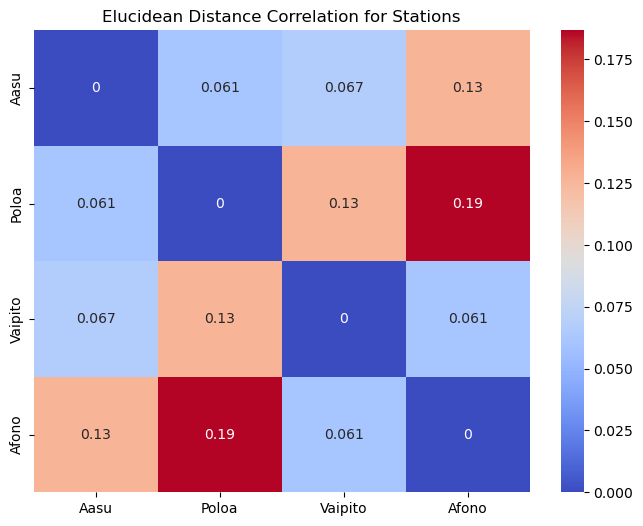

In [34]:
# Example heatmap for one variable
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, annot=True, xticklabels=station_names, yticklabels=station_names, cmap="coolwarm")
plt.title(f'Elucidean Distance Correlation for Stations')
plt.show()

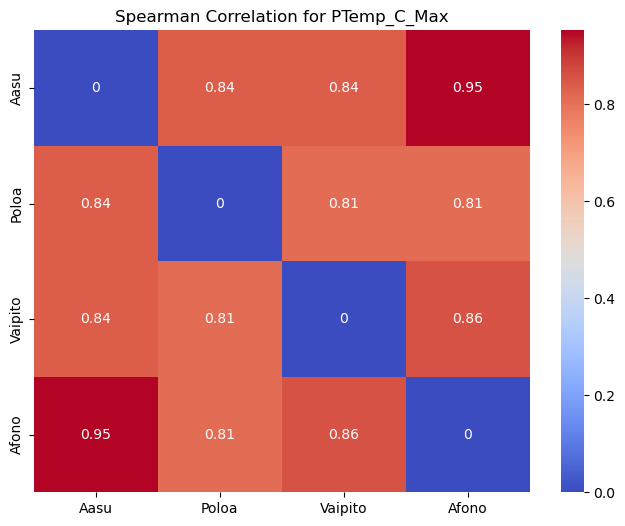

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example heatmap for one variable
variable = list(variable_correlations.keys())[0]
plt.figure(figsize=(8, 6))
sns.heatmap(variable_correlations[variable], annot=True, xticklabels=station_names, yticklabels=station_names, cmap="coolwarm")
plt.title(f'Spearman Correlation for {variable}')
plt.show()


In [35]:
#calculate a score per variable
def compute_combined_score(distance_matrix, variable_correlations, station_names, corr_weight=1, dist_weight=0.5):
    """
    Computes a combined score for selecting the best station for gap filling.
    Higher scores indicate better candidates.
    """
    n_stations = len(station_names)
    combined_scores = np.zeros((n_stations, n_stations))

    for i in range(n_stations):
        for j in range(n_stations):
            if i == j:
                combined_scores[i, j] = np.nan  # Skip diagonal
                continue
            combined_scores[i, j] = corr_weight * correlation_matrix[i, j] - dist_weight * distance_matrix[i, j]

    return pd.DataFrame(combined_scores, index=station_names, columns=station_names)


for variable_pair, correlation_matrix in variable_correlations.items():
    print(f"\nCombined Score Matrix for {variable_pair}:")
    combined_scores = compute_combined_score(distance_matrix, variable_correlations, station_names)
    print(combined_scores)



Combined Score Matrix for PTemp_C_Max:
             Aasu     Poloa   Vaipito     Afono
Aasu          NaN  0.807255  0.803990  0.889519
Poloa    0.807255       NaN  0.745680  0.714874
Vaipito  0.803990  0.745680       NaN  0.826279
Afono    0.889519  0.714874  0.826279       NaN

Combined Score Matrix for AirTF_Avg:
             Aasu     Poloa   Vaipito     Afono
Aasu          NaN  0.845275  0.863678  0.800347
Poloa    0.845275       NaN  0.719546  0.674787
Vaipito  0.863678  0.719546       NaN  0.880594
Afono    0.800347  0.674787  0.880594       NaN

Combined Score Matrix for RH:
             Aasu     Poloa   Vaipito     Afono
Aasu          NaN  0.726284  0.826565  0.642303
Poloa    0.726284       NaN  0.606834  0.480997
Vaipito  0.826565  0.606834       NaN  0.676583
Afono    0.642303  0.480997  0.676583       NaN

Combined Score Matrix for Rain_in_Tot:
             Aasu     Poloa   Vaipito     Afono
Aasu          NaN  0.459841  0.448654  0.339756
Poloa    0.459841       NaN  0.2930

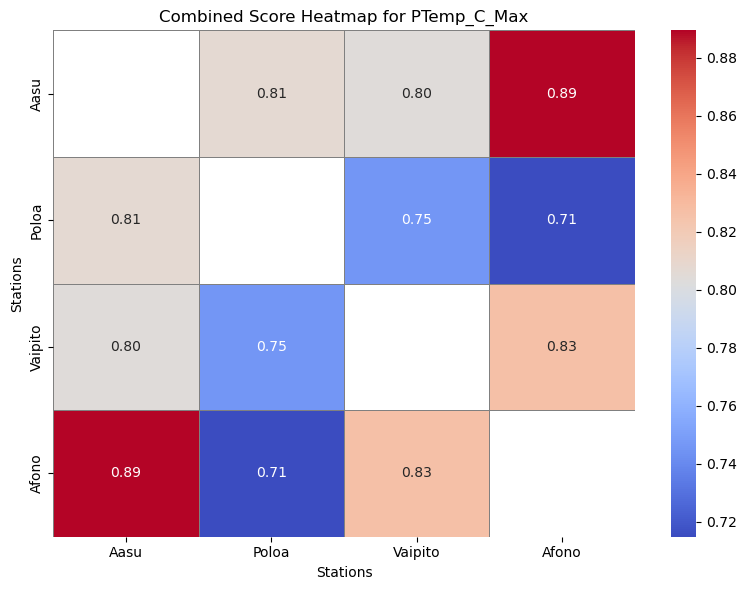

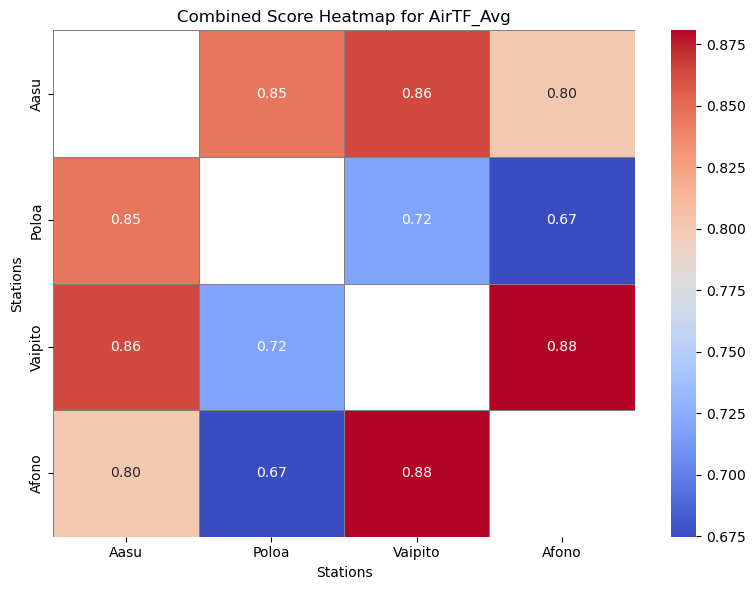

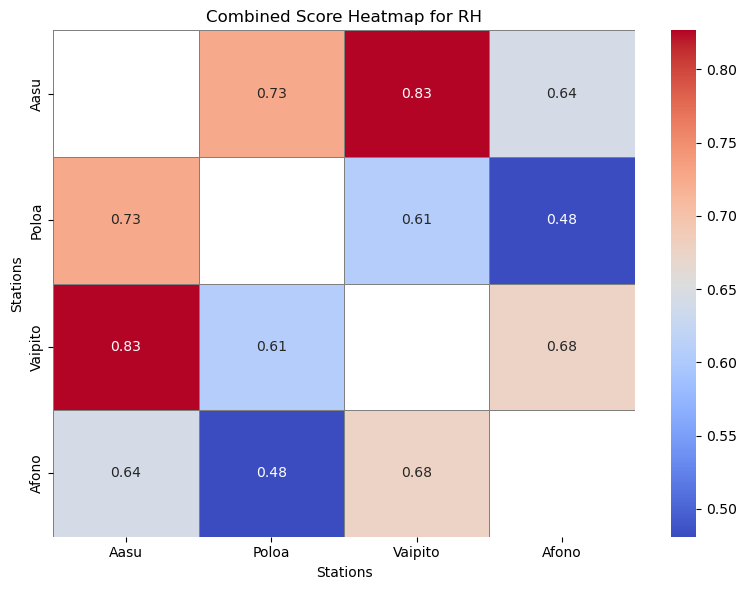

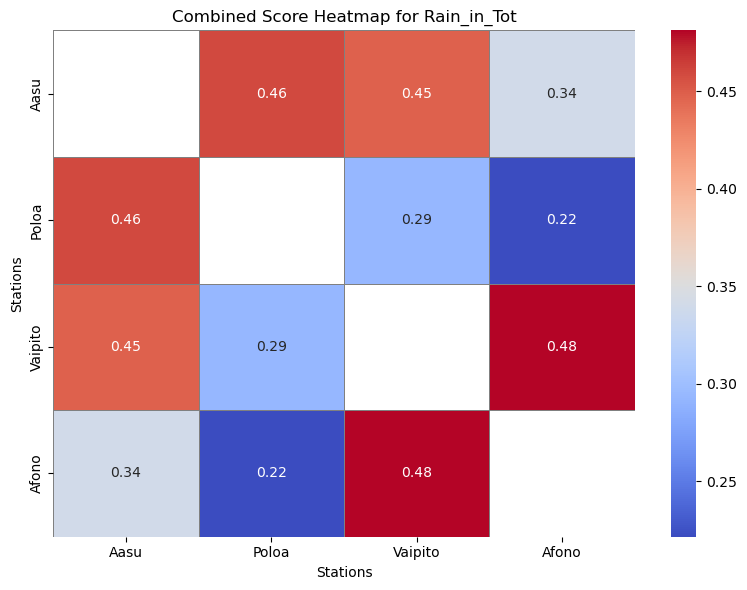

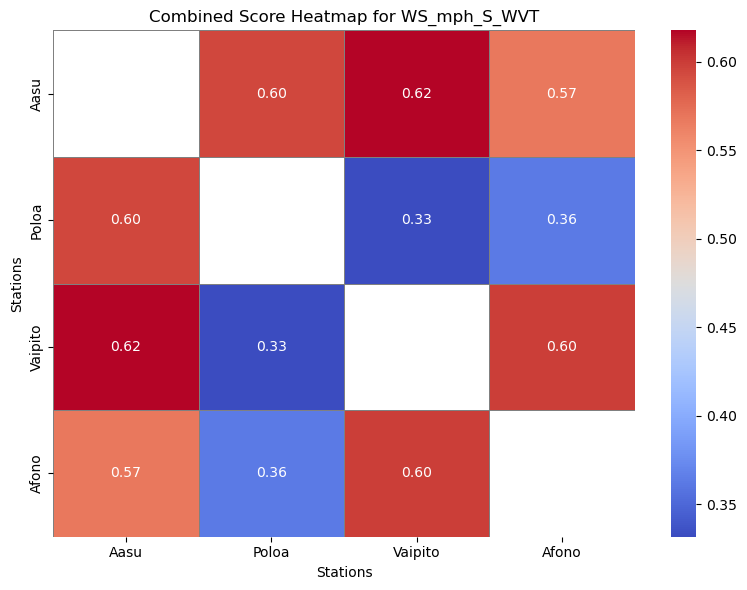

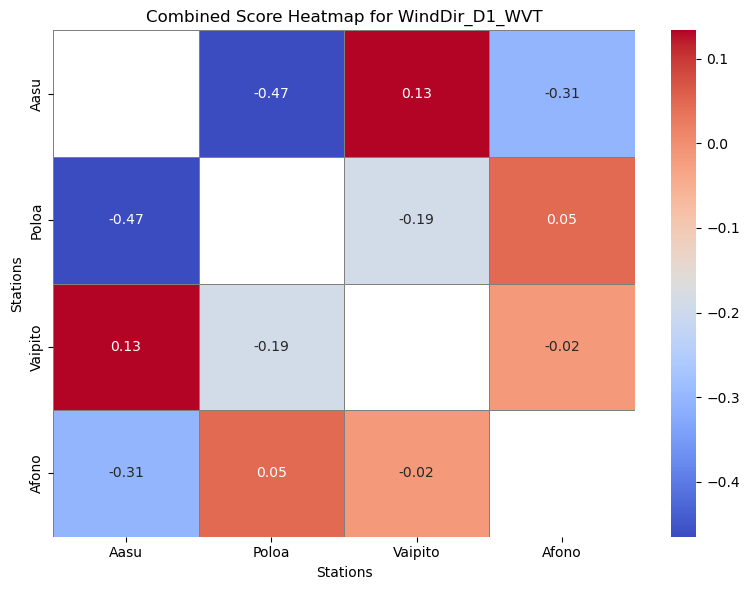

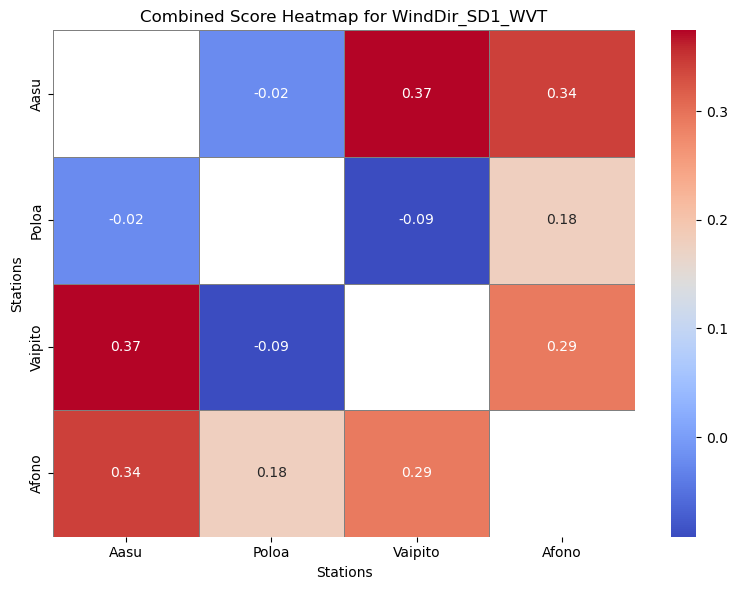

In [36]:
for variable_pair, correlation_matrix in variable_correlations.items():
    combined_scores = compute_combined_score(distance_matrix, correlation_matrix, station_names)

    plt.figure(figsize=(8, 6))
    sns.heatmap(combined_scores, annot=True, fmt=".2f", cmap="coolwarm",
                xticklabels=station_names, yticklabels=station_names, linewidths=0.5, linecolor='gray')
    plt.title(f'Combined Score Heatmap for {variable_pair}')
    plt.xlabel('Stations')
    plt.ylabel('Stations')
    plt.tight_layout()
    plt.show()

In [12]:
import pandas as pd
import numpy as np
import gstools as gs
from pyproj import Transformer
from sklearn.preprocessing import MinMaxScaler

# Step 1: Convert timestamps to numerical scale (e.g., hours since the start)
def preprocess_data(df1, df2, lat1, lon1, lat2, lon2, value_column='PTemp_C_Max'):
    """
    Preprocesses data for spatio-temporal kriging.
    - Converts timestamps to a numerical scale.
    - Aligns the two datasets based on matching timestamps.
    - Adds spatial coordinates.
    """
    # Merge the data on TIMESTAMP
    merged_df = pd.merge(df1, df2, on='TIMESTAMP', suffixes=('_1', '_2'))
    merged_df['Timestamp_Num'] = pd.to_datetime(merged_df['TIMESTAMP']).astype(int) // 10**9  # Convert to UNIX time

    # Add spatial coordinates for Aasu and Afono
    transformer = Transformer.from_crs("EPSG:4326", "EPSG:32702", always_xy=True)
    x1, y1 = transformer.transform(lon1, lat1)
    x2, y2 = transformer.transform(lon2, lat2)
    merged_df['X_1'], merged_df['Y_1'] = x1, y1
    merged_df['X_2'], merged_df['Y_2'] = x2, y2

    return merged_df

def fit_variogram(data, x_col, y_col, time_col, value_col):
    """
    Fits a spatio-temporal variogram model using GSTools.
    """
    # Combine spatial and temporal coordinates into a single array
    space_time_coords = np.array([
        data[x_col].values,
        data[y_col].values,
        data[time_col].values
    ]).T
    values = data[value_col].values

    # Debugging: Print shapes and check for NaNs
    print(f"Coordinates shape: {space_time_coords.shape}")
    print(f"Values shape: {values.shape}")
    print(f"NaNs in coordinates: {np.isnan(space_time_coords).any()}")
    print(f"NaNs in values: {np.isnan(values).any()}")

    # Remove rows with NaN in either coordinates or values
    valid_mask = ~np.isnan(space_time_coords).any(axis=1) & ~np.isnan(values)
    space_time_coords = space_time_coords[valid_mask]
    values = values[valid_mask]

    # Debugging: Print after filtering
    print(f"Filtered Coordinates shape: {space_time_coords.shape}")
    print(f"Filtered Values shape: {values.shape}")

    # Ensure the coordinate array has the correct dimensions
    if space_time_coords.ndim != 2 or space_time_coords.shape[1] != 3:
        raise ValueError("Coordinates must have shape (n_samples, 3) for X, Y, and Time.")

    # Estimate the spatio-temporal variogram
    bin_center, vario = gs.vario_estimate(space_time_coords, values, binning='even', n_lags=15)

    # Fit a variogram model (e.g., Exponential model)
    model = gs.Exponential(dim=3)  # 3 dimensions: X, Y, Time
    model.fit_variogram(bin_center, vario)
    return model


# Step 4: Apply the Workflow
def spatio_temporal_gap_fill(aasu_df, afono_df, lat1, lon1, lat2, lon2, value_column='PTemp_C_Max'):
    # Preprocess data
    data = preprocess_data(aasu_df, afono_df, lat1, lon1, lat2, lon2, value_column=value_column)

    # Identify missing values in Aasu
    missing_mask = data[f'{value_column}_1'].isna()

    # Fit variogram model
    model = fit_variogram(data.loc[~missing_mask], 'X_2', 'Y_2', 'Timestamp_Num', f'{value_column}_2')

    # Perform kriging to fill missing values in Aasu
    filled_data = krige_gap_fill(data, model, missing_mask, 'X_1', 'Y_1', 'Timestamp_Num', f'{value_column}_1')

    return filled_data



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def calculate_mape(actual, predicted):
    """
    Calculates Mean Absolute Percentage Error (MAPE).
    """
    nonzero_actual = actual[actual != 0]
    predicted_nonzero = predicted[actual != 0]
    return np.mean(np.abs((nonzero_actual - predicted_nonzero) / nonzero_actual)) * 100
import pandas as pd
import numpy as np
from skgstat import Variogram
from skgstat import OrdinaryKriging
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def preprocess_data_skg(aasu_df, afono_df, value_column='PTemp_C_Max'):
    """
    Preprocesses data for spatial kriging.
    - Aligns the two datasets based on matching timestamps.
    - Returns aligned DataFrame with coordinates and values.
    """
    # Merge the data on TIMESTAMP
    merged_df = pd.merge(aasu_df, afono_df, on='TIMESTAMP', suffixes=('_1', '_2'))

    # Filter rows with valid Rain_in_Tot values
    merged_df = merged_df.dropna(subset=[f'{value_column}_1', f'{value_column}_2'])

    # Debugging: Print number of aligned timestamps
    print(f"Number of matched timestamps in known data: {len(merged_df)}")

    return merged_df

def fit_variogram_skg(data, x_col, y_col, value_col, sample_size=1000):
    """
    Fits a variogram model using skgstat, with subsampling for computational efficiency.
    Ensures proper numeric conversion and handles non-numeric values.
    """
    # Ensure the value column is numeric
    data[value_col] = pd.to_numeric(data[value_col], errors='coerce')
    data = data.dropna(subset=[value_col])  # Drop rows with NaN in the value column

    # Ensure coordinates are numeric
    data[x_col] = pd.to_numeric(data[x_col], errors='coerce')
    data[y_col] = pd.to_numeric(data[y_col], errors='coerce')
    data = data.dropna(subset=[x_col, y_col])  # Drop rows with NaN in coordinates

    # Debugging: Check data types
    print(f"Data types: {data.dtypes}")
    print(f"Number of valid rows after cleaning: {len(data)}")

    # Subsample the data to reduce computation
    if len(data) > sample_size:
        sampled_data = data.sample(n=sample_size, random_state=42)
    else:
        sampled_data = data

    # Combine spatial coordinates into a single array
    coords = np.array([sampled_data[x_col].values, sampled_data[y_col].values]).T
    values = sampled_data[value_col].values

    # Ensure numeric types for values
    coords = np.ascontiguousarray(coords, dtype=np.float64)
    values = np.ascontiguousarray(values, dtype=np.float64)

    # Debugging: Check shapes and types
    print(f"Coordinates shape: {coords.shape}")
    print(f"Values shape: {values.shape}")
    print(f"NaNs in coordinates: {np.isnan(coords).any()}")
    print(f"NaNs in values: {np.isnan(values).any()}")

    # Fit variogram model
    print(f"Fitting variogram with {len(values)} sampled points...")
    variogram = Variogram(
        coords,
        values,
        model='exponential',  # Choose a model: exponential, spherical, gaussian, etc.
        bin_func='even',
        n_lags=15
    )
    print(f"Fitted Variogram Parameters: {variogram.parameters}")
    return variogram


def krige_gap_fill_skg(data, variogram, x_col, y_col, train_mask, test_mask, value_col):
    """
    Performs kriging to predict missing values in the dataset using skgstat.
    """
    # Training data
    train_coords = np.array([data.loc[train_mask, x_col].values, data.loc[train_mask, y_col].values]).T
    train_values = data.loc[train_mask, value_col].values

    # Testing data
    test_coords = np.array([data.loc[test_mask, x_col].values, data.loc[test_mask, y_col].values]).T

    # Perform ordinary kriging
    print("Performing ordinary kriging...")
    krige = OrdinaryKriging(variogram, train_coords, train_values)
    predicted_values = krige.transform(test_coords)

    return predicted_values

def train_test_split_kriging_skg(aasu_df, afono_df, lat1, lon1, lat2, lon2, value_column='PTemp_C_Max', test_size=0.2):
    """
    Performs training/testing split for kriging with skgstat and calculates MAPE.
    """
    # Step 1: Preprocess data
    data = preprocess_data_skg(aasu_df, afono_df, value_column=value_column)

    # Add spatial coordinates
    data['X_1'], data['Y_1'] = lon1, lat1  # Aasu coordinates
    data['X_2'], data['Y_2'] = lon2, lat2  # Afono coordinates

    # Step 2: Identify training and testing masks
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=42, shuffle=False)
    train_mask = data.index.isin(train_data.index)
    test_mask = data.index.isin(test_data.index)

    # Step 3: Fit variogram on the training set
    variogram = fit_variogram_skg(train_data, 'X_2', 'Y_2', f'{value_column}_2')

    # Step 4: Perform kriging to predict values in the test set
    predicted_test_values = krige_gap_fill_skg(data, variogram, 'X_1', 'Y_1', train_mask, test_mask, f'{value_column}_1')

    # Step 5: Calculate MAPE
    actual_test_values = data.loc[test_mask, f'{value_column}_1'].values
    mape = calculate_mape(actual_test_values, predicted_test_values)

    print(f"MAPE for Spatial Kriging: {mape:.2f}%")

    # Return results for analysis
    return train_data, test_data, predicted_test_values, mape

# Example Usage
train_data, test_data, predicted_test_values, mape = train_test_split_kriging_skg(
    aasu_df=filtered_stations['Aasu'],
    afono_df=filtered_stations['Afono'],
    lat1=-14.31, lon1=-170.77,
    lat2=-14.32, lon2=-170.83,
    value_column='PTemp_C_Max',
    test_size=0.2
)

print("\nExample Testing Results:")
print(test_data[['TIMESTAMP', 'PTemp_C_Max_1']].head())
print("Predicted Values:", predicted_test_values[:5])




Number of matched timestamps in known data: 5775
Data types: LAT_1                       float64
LON_1                       float64
TIMESTAMP            datetime64[ns]
PTemp_C_Max_1                object
AirTF_Avg_1                  object
RH_1                         object
Rain_in_Tot_1                object
WS_mph_S_WVT_1               object
WindDir_D1_WVT_1             object
WindDir_SD1_WVT_1            object
LAT_2                       float64
LON_2                       float64
PTemp_C_Max_2               float64
AirTF_Avg_2                  object
RH_2                         object
Rain_in_Tot_2                object
WS_mph_S_WVT_2               object
WindDir_D1_WVT_2             object
WindDir_SD1_WVT_2            object
X_1                         float64
Y_1                         float64
X_2                         float64
Y_2                         float64
dtype: object
Number of valid rows after cleaning: 4620
Coordinates shape: (1000, 2)
Values shape: (1000,)
NaNs

/Users/lizamclatchy/anaconda3/lib/python3.11/site-packages/skgstat/Variogram.py:2132: RuntimeWarning: All-NaN slice encountered
  bounds = [np.nanmax(x), np.nanmax(y)]


ValueError: `ydata` must not be empty!